In [1]:
import sys
import torch
from torch import nn
import pprint
import matplotlib.pyplot as plt

sys.path.append("../") # if running from this folder
from src.models import NAVAR
from src.data import load_dataset
from src.training import train_model
from src.utils import tensor_dict_to_str
from src.eval.visualisations import plot_heatmaps

In [2]:
dataset = load_dataset('dream3', 'ecoli1')[0]

In [3]:
tensor_dict_to_str(dataset)  # better formatting for printing large tensors

{'name': 'ecoli1',
 'data': 'torch.Size([46, 100, 21])',
 'ground_truth': 'torch.Size([100, 100])'}

In [4]:
tensor_data = dataset['data']
tensor_data.shape

torch.Size([46, 100, 21])

In [5]:
ground_truth = dataset['ground_truth']
ground_truth.shape

torch.Size([100, 100])

In [6]:
params = {
    # experiment
    'experiment_name': 'Example_experiment',
    'model_type': NAVAR,
    'dataset': dataset,
    # training
    'lr': 0.001,
    'epochs': 500,
    'weight_decay': 0.001,
    'test_size': 0.3,
    'batch_size': 16,
    # tcn
    'hidden_dim': 8,
    'kernel_size': 2,
    'n_blocks': 2,
    'n_layers': 1,
    'dropout': 0.2,
    # navar
    'lambda1': 0.01,  # regularization
}

In [7]:
result = train_model(**params)

[train] loss=0.42,AUROC=0.51 [test] loss=0.58,AUROC=0.53: 100%|██████████████████████| 500/500 [00:15<00:00, 31.61it/s]


In [8]:
# Metrics are outputted as (epochs, values) as the test_metrics are only computed every x steps
pprint.pprint(tensor_dict_to_str(result)) # better formatting for printing large tensors

{'model_params': {'dataset_name': 'ecoli1',
                  'dropout': 0.2,
                  'epochs': 500,
                  'hidden_dim': 8,
                  'kernel_size': 2,
                  'lambda1': 0.01,
                  'lr': 0.001,
                  'model': "<class 'type'>",
                  'n_blocks': 2,
                  'n_layers': 1,
                  'n_params': 107700,
                  'optimizer': 'AdamW',
                  'receptive_field': 4,
                  'test_size': 0.3,
                  'training_time_per_epoch': 0.03177259437530395,
                  'weight_decay': 0.001},
 'test_artifacts': {'FPR': 'torch.Size([10000])',
                    'TPR': 'torch.Size([10000])',
                    'contributions': 'torch.Size([46, 100, 100, 4])',
                    'matrix': 'torch.Size([100, 100])',
                    'prediction': 'torch.Size([46, 100, 4])'},
 'test_data': {'x': 'torch.Size([46, 100, 7])'},
 'test_metrics': {'AUROC': "('torch.Size(

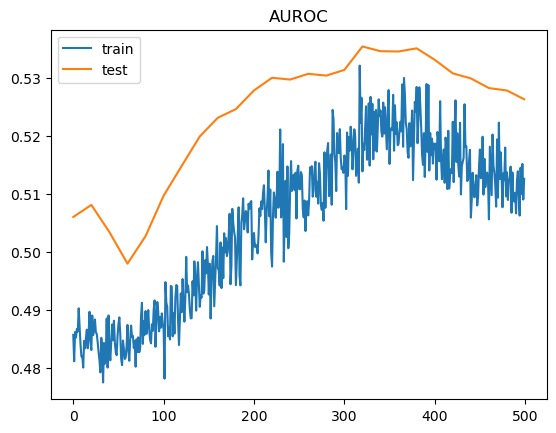

In [9]:
plt.plot(*result['train_metrics']['AUROC'], label='train')
plt.plot(*result['test_metrics']['AUROC'], label='test')
plt.title('AUROC')
plt.legend()
plt.show()

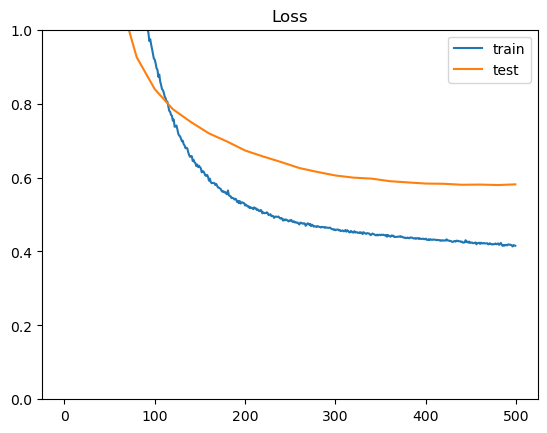

In [10]:
plt.plot(*result['train_metrics']['loss'], label='train')
plt.plot(*result['test_metrics']['loss'], label='test')
plt.ylim(0, 1)
plt.title('Loss')
plt.legend()
plt.show()

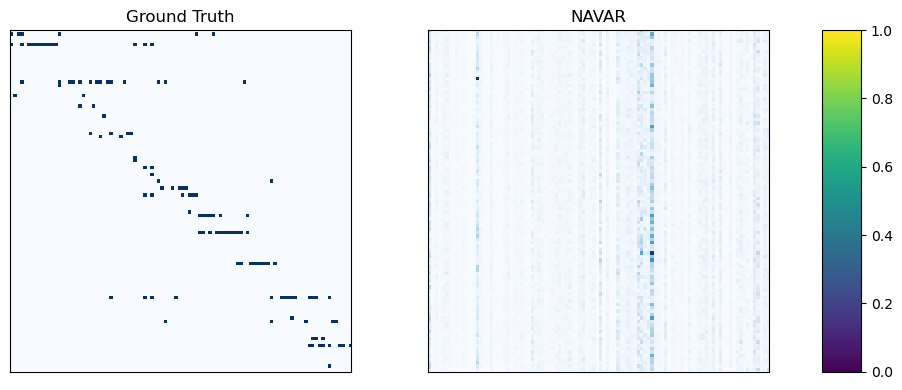

In [11]:
plot_heatmaps(dataset['ground_truth'], result['test_artifacts']['matrix'], names=['Ground Truth', 'NAVAR'], use_ticks=False)
fig = plt.gcf()
fig.set_size_inches(10, 4, forward=True)

In [12]:
# return metrics data (loss AUC etc.)
model(tensor_data)

NameError: name 'model' is not defined

In [ ]:
# create_artifacts will return artifacts alongside metrics (contributions, causal matrix etc.)
model(tensor_data, create_artifacts=True)

In [ ]:
# temporal_matrix will apply a sliding window std to construct a temporal matrix
model(tensor_data, create_artifacts=True, temporal_matrix=True)

In [ ]:
# ground_truth will compute AUC etc. and adds it to metrics
model(tensor_data, create_artifacts=True, ground_truth=ground_truth)